In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import math
import seaborn as sns
import pickle

In [27]:
# N = 100
# r = 1
# df = pd.DataFrame({
#     'F':40*np.random.rand(N)+50
# })

In [28]:
# df['C'] = (5/9)*(df['F']-32) + 1*np.random.normal(size=N)
# df

In [29]:
# pickle.dump( df, open( "save.p", "wb" ) )
# df.drop(columns=['U1*s1' ,'Ftilde' ,'Ctilde'],inplace=True)

In [43]:
df = pickle.load(open( "save.p", "rb" ))
X = df.values
df.head(10)

,F,C
0,62.87,16.72
1,76.87,26.56
2,83.03,27.40
3,89.86,32.25
4,71.55,21.22
5,89.30,33.20
6,55.18,12.69
7,56.37,13.13
8,57.78,14.30
9,76.69,23.36


In [31]:
pd.set_option("display.precision", 2)

In [32]:
Xmean = np.mean(X, axis=0)
Xc = X - Xmean
pd.DataFrame(Xc)

,0,1
0,-8.26,-5.01
1,5.74,4.83
2,11.90,5.67
3,18.73,10.52
4,0.41,-0.51
...,...,...
95,-14.90,-9.49
96,-12.63,-7.47
97,-6.33,-5.10
98,16.72,10.65


In [33]:
U, s, Vt = svd(Xc,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

print(Sigma, V)

[[136.78945623   0.        ]
 [  0.           9.21691138]] [[ 0.8722287   0.48909825]
 [ 0.48909825 -0.8722287 ]]


In [34]:
r = 1
Ur = U[:,:r]
Vr = V[:,:r]
Sr = Sigma[:r,:r]


In [35]:
XDr = Ur@Sr@Vr.T + Xmean
XDr.shape

(100, 2)

Text(0.5, 0, '')

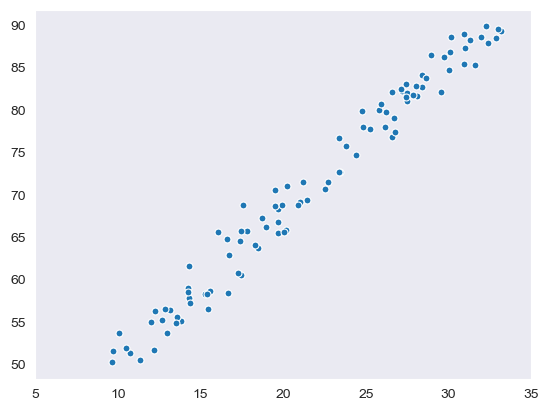

In [36]:
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
plt.grid()
# plt.axis('equal')
plt.xlim((5,35))
plt.ylabel('')
plt.xlabel('')

In [37]:
Xrr = Ur@Sr
df2 = pd.DataFrame({'PC1':Xrr[:,0]})
df2

,PC1
0,-9.65
1,7.37
2,13.15
3,21.48
4,0.11
...,...
95,-17.64
96,-14.67
97,-8.02
98,19.80


Text(0.5, 0, '')

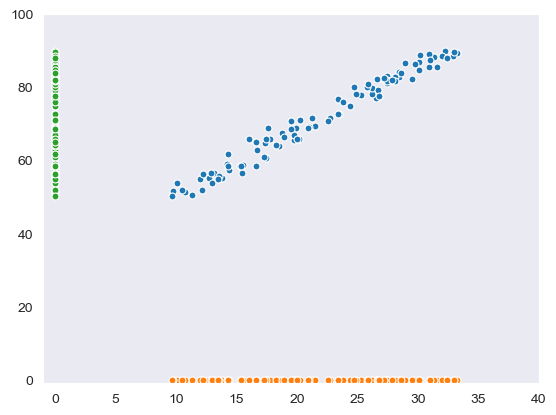

In [38]:
df['z'] = 0 * df['F']
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
sns.scatterplot(data=df,y='z',x='C',s=100,marker='.')
sns.scatterplot(data=df,y='F',x='z',s=100,marker='.')
plt.grid()
# plt.axis('equal')
plt.xlim((-1,40))
plt.ylim((-1,100))
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

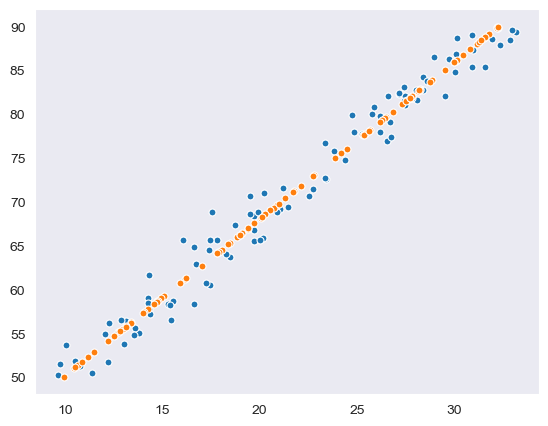

In [39]:
plt.figure(figsize=(6.5,5))
sns.scatterplot(data=df,y='F',x='C',s=100,marker='.')
sns.scatterplot(y=XDr[:,0],x=XDr[:,1],s=100,marker='.')
plt.grid()
plt.ylabel('')
plt.xlabel('')

([], [])

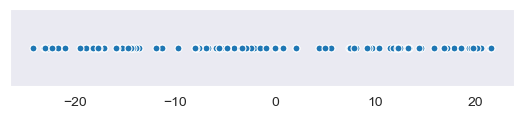

In [40]:
plt.figure(figsize=(6.5,1))
sns.scatterplot(data=df2,x='PC1',y=0,s=100,marker='.')
plt.grid()
plt.xlabel('')
plt.yticks([])

In [41]:
z = df2.describe()
z.loc['max','PC1']-z.loc['min','PC1']

45.74656664931061